You can download the dataset from the following link: https://www.kaggle.com/datasets/hassan06/nslkdd

The dataset contain the records of the internet traffic observed by a simple intrusion detection systems in the computer network monitoring the network traffic and identify the ghost attacks in the network. The data set contains 43 features per record, with 41 of the features referring to the traffic input itself and the last two are labels (whether it is a normal or any of the network attack type) and Level (the severity of the traffic input itself).

###Importing libraries and loading the dataset We will begin by importing the necessary libraries and loading the dataset.

In [1]:
# Import Pandas & numpy for DataFrame Creation and Perform Exploratory Data Analysis
import pandas as pd
import numpy as np

# Import seaborn, matplotlib for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for preprocessing
from statistics import stdev
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

# Import train_test_split for separating training data and test data
from sklearn.model_selection import train_test_split

# Import necessary ML Model from SKLEARN
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation metrics methods from SKLEARN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

%matplotlib inline

# Load the dataset
kdd_train_df = pd.read_csv('KDDTrain+.txt', header=None)


We are defining column names explicitly for better readability and manipulation of the data. Each column name corresponds to a specific attribute of the network data . These column names likely correspond to various features and attributes related to network traffic and potential intrusions. Assigning meaningful column names enhances the clarity and interpretability of the dataset when performing data analysis or machine learning tasks. Each column represents a specific aspect of the network data, such as the type of protocol, service being used, packet sizes, error rates, type of network attack and more.

In [2]:
# List of Column names to be assigned to dataset
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
            'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
            'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
            'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
            'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
            'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

# Assigning column names explicitly
kdd_train_df.columns = columns


In [3]:
print(kdd_train_df.shape)

(125973, 43)


# Data Exploration and Pre-processing

In [4]:
#Display the first few rows of the DataFrame kdd_train_df
kdd_train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
# Print the description (summary statistics) of the dataset
print("Description of the Dataset:")
kdd_train_df.describe()

Description of the Dataset:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [49]:
kdd_train_df.size

5416839

In [6]:
kdd_train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
print('Statistical Summary for Numerical Attributes')
kdd_train_df.describe()

Statistical Summary for Numerical Attributes


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
print('Statistical Summary for Categorical Attributes')
kdd_train_df.select_dtypes(include=object).describe()

Statistical Summary for Categorical Attributes


,protocol_type,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [9]:
missing_values = kdd_train_df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_sr

In [10]:
duplicate_rows = kdd_train_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
kdd_train_df[kdd_train_df.duplicated()]

Number of duplicate rows: 0


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


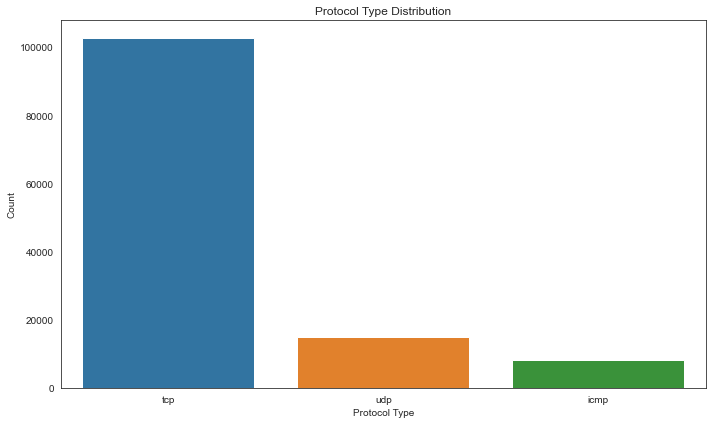

In [11]:
# Protocol type distribution
sns.set_style("white")

plt.figure(figsize=(10, 6))
sns.countplot(data=kdd_train_df, x='protocol_type', order=kdd_train_df['protocol_type'].value_counts().index)
plt.title('Protocol Type Distribution')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

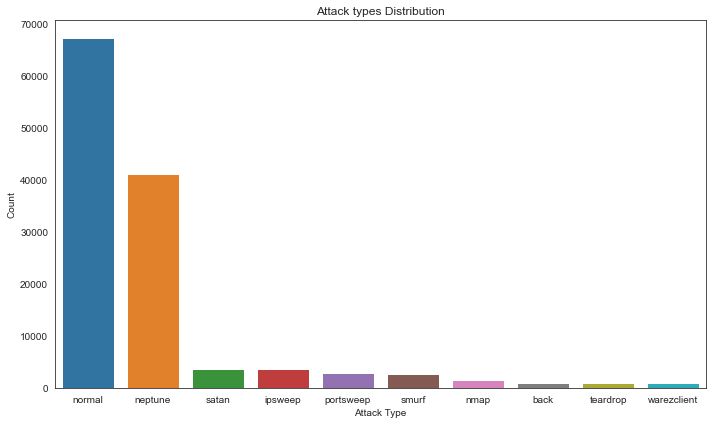

In [12]:
# Attack distribution
sns.set_style("white")

plt.figure(figsize=(10, 6))
sns.countplot(data=kdd_train_df, x='attack', order=kdd_train_df['attack'].value_counts().head(10).index)
plt.title('Attack types Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

We are categorizing our different attack types (in below section) according to their category in context of Network Security, thus helping us to explore multi-classification techniques over binary classification (either normal or attack) techniques during ML modeling.

For Outlier detection, we are using the Z-score method, which is a common method to identify data points that are significantly different from the mean of a distribution assuming the data is normally distributed. We are calculating the Z-scores for each numeric column in the dataset using the zscore() function from scipy.stats. The Z-score indicates how many standard deviations a data point is away from the mean. We set a threshold as 3-StandardDeviation to identify data points that have Z-scores above this threshold, indicating that they are potential outliers.

In [13]:
from scipy.stats import zscore

numeric_columns = ['src_bytes', 'dst_bytes', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'dst_host_serror_rate', 'count', 'duration',
       'dst_host_srv_count', 'dst_host_srv_count',
       'dst_host_srv_rerror_rate']

# Calculate z-scores for outlier detection
z_scores = zscore(kdd_train_df[numeric_columns])

# Identify outliers using a threshold (e.g., z-score > 3 or < -3)
outlier_mask = (z_scores > 3) | (z_scores < -3)

# Count the number of outliers in each column
outlier_counts = outlier_mask.sum(axis=0)

# Display the number of outliers for each column
for col, count in zip(numeric_columns, outlier_counts):
    print(f"Number of outliers in {col}: {count}")

Number of outliers in src_bytes: 11
Number of outliers in dst_bytes: 3
Number of outliers in same_srv_rate: 0
Number of outliers in diff_srv_rate: 4237
Number of outliers in dst_host_srv_count: 0
Number of outliers in dst_host_same_srv_rate: 0
Number of outliers in logged_in: 0
Number of outliers in dst_host_serror_rate: 0
Number of outliers in count: 2661
Number of outliers in duration: 1431
Number of outliers in dst_host_srv_count: 0
Number of outliers in dst_host_srv_count: 0
Number of outliers in dst_host_srv_rerror_rate: 0


Label encoding technique to convert categorical variables like protocol type, service, flag, attack, attack_label, attack_category into numerical values. This technique assigns a unique integer to each category within each of these categorical variable. We are doing this to prepare categorical data for machine learning algorithms, as many ML algorithms requires only numerical input.

In [15]:
#Training Data
bin_class = pd.DataFrame(kdd_train_df.attack.map(lambda x:'normal' if x=='normal' else 'abnormal'))
kdd_train_df['attack_label'] = bin_class
kdd_btrain_df = kdd_train_df.copy()
kdd_btrain_df.drop(['attack'], axis=1,inplace=True)


kdd_bencoded_df = kdd_btrain_df.copy()
categorical_columns = ['protocol_type','service','flag','attack_label']
le = {}
for column in categorical_columns:
    le[column] = LabelEncoder()

# fit and transform the categorical data
for column in categorical_columns:
    kdd_bencoded_df[column] = le[column].fit_transform(kdd_bencoded_df[column])

Apply the feature transformation technique

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Copy the dataset to a new DataFrame for transformation
kdd_transformed_df = kdd_train_df.copy()

# Apply Min-Max Normalization to numeric columns
scaler = MinMaxScaler()
kdd_transformed_df[numeric_columns] = scaler.fit_transform(kdd_transformed_df[numeric_columns])

# Display the first few rows of the transformed dataset
kdd_transformed_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_label
0,0.0,tcp,ftp_data,SF,3.558064e-07,0.000000e+00,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0.0,udp,other,SF,1.057999e-07,0.000000e+00,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0.0,tcp,private,S0,0.000000e+00,0.000000e+00,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,abnormal
3,0.0,tcp,http,SF,1.681203e-07,6.223962e-06,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0.0,tcp,http,SF,1.442067e-07,3.206260e-07,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [17]:
categorical_columns = kdd_train_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['protocol_type', 'service', 'flag', 'attack', 'attack_label'], dtype='object')


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Copy the dataset to a new DataFrame for transformation
kdd_btransformed_df = kdd_bencoded_df.copy()

# Apply Min-Max Normalization to numeric columns
scaler = MinMaxScaler()
kdd_btransformed_df[numeric_columns] = scaler.fit_transform(kdd_btransformed_df[numeric_columns])

# Display the first few rows of the transformed dataset
#kdd_btransformed_df.head()

Feature selection using Mutual Information, Chi square, Gini Index measures.

In [21]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score

X = kdd_btransformed_df.drop("attack_label", axis=1)
y = kdd_btransformed_df["attack_label"]

mutual_info = mutual_info_classif(X, y)
top_features = mutual_info.argsort()[-10:][::-1]
top_feature_names = X.columns[top_features]



print(f"Top 10 significant features by mutual information: {top_feature_names}")

Top 10 significant features by mutual information: Index(['src_bytes', 'service', 'dst_bytes', 'flag', 'same_srv_rate',
       'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'dst_host_diff_srv_rate'],
      dtype='object')


In [22]:
import pandas as pd
from sklearn.feature_selection import chi2

chi2_scores, _ = chi2(X, y)
top_features = chi2_scores.argsort()[-10:][::-1]
top_feature_names = X.columns[top_features]

print(f"Top 10 significant features by Chi-Squared test: {top_feature_names}")

Top 10 significant features by Chi-Squared test: Index(['num_outbound_cmds', 'dst_host_count', 'service', 'flag',
       'dst_host_srv_serror_rate', 'srv_serror_rate', 'serror_rate',
       'dst_host_serror_rate', 'logged_in', 'num_root'],
      dtype='object')


In [23]:
#Split dataset 
kdd_btransformed_df=kdd_btransformed_df[['src_bytes', 'service', 'dst_bytes', 'flag', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_serror_rate', 'protocol_type','service','flag','attack_label']]
X = kdd_btransformed_df[['src_bytes', 'service', 'dst_bytes', 'flag', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'dst_host_serror_rate', 'protocol_type','service','flag']].values
y = kdd_btransformed_df['attack_label']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [24]:
#Feature scaling -K-means clusteringis sensitive to the scale of the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)

[[-0.00725622 -0.44290579 -0.44290579 ... -0.44290579  0.7502675
   0.7502675 ]
 [-0.00726222 -0.44290579 -0.44290579 ... -0.44290579  0.7502675
   0.7502675 ]
 [-0.00725725 -0.44290579 -0.44290579 ... -0.44290579  0.7502675
   0.7502675 ]
 ...
 [-0.00730494  0.7811262   0.7811262  ...  0.7811262  -1.11103617
  -1.11103617]
 [-0.00710695  1.39314219  1.39314219 ...  1.39314219  0.7502675
   0.7502675 ]
 [-0.00726823 -0.44290579 -0.44290579 ... -0.44290579  0.7502675
   0.7502675 ]]


In [25]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Downsample training set to 10% of its original size. Please note, you can try using the full dataset.
downsample_ratio = 0.1
X_train_downsampled, _, y_train_downsampled, _ = train_test_split(X_train, y_train, train_size=downsample_ratio, random_state=0)

# Print the shape of the downsampled training set
print("Shape of downsampled training set:", X_train_downsampled.shape)


Shape of downsampled training set: (11337, 17)


K Nearest Neighbor Classifier

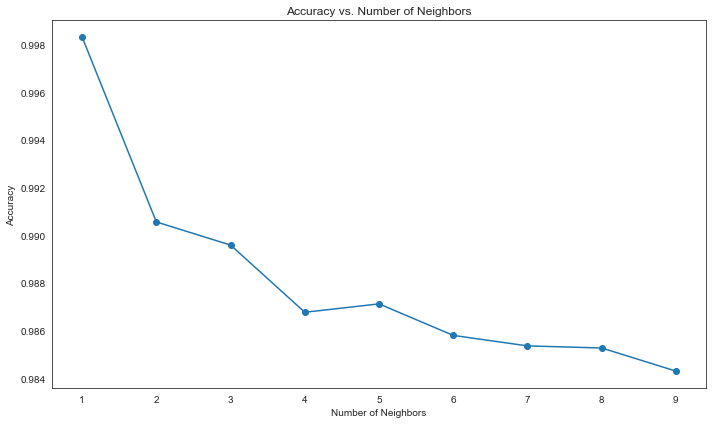

In [26]:
# Test different values of n_neighbors
neighbors = range(1, 10)  
accuracy_scores = []

for n in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train_downsampled, y_train_downsampled)  # Use downsampled training data
    accuracy_scores.append(knn_classifier.score(X_train_downsampled, y_train_downsampled))

# Plot the accuracy scores against the number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.tight_layout()
plt.show()

In [27]:
# Define the model: Init K-NN
knn_classifier = KNeighborsClassifier(n_neighbors=6, p=2, metric='euclidean')
# knn_classifier = KNeighborsClassifier(n_neighbors=6)

# Fit Model
knn_classifier.fit(X_train_downsampled, y_train_downsampled)

# Predict the test set results
y_pred = knn_classifier.predict(X_test)



accuracy = 0.9812668677567868
f1 score =  0.9823854306612928
precision score =  0.9817991943905714
recall score =  0.9829723674383869
roc score =  0.9811524551066236

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5903
           1       0.98      0.98      0.98      6695

    accuracy                           0.98     12598
   macro avg       0.98      0.98      0.98     12598
weighted avg       0.98      0.98      0.98     12598



Text(0.5, 1.0, 'KNN Classifier')

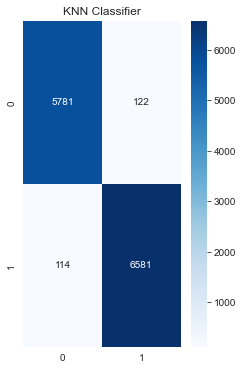

In [28]:
# Evaluate Model
cm_knn = confusion_matrix(y_test, y_pred)
#print('Confusion Matrix')
#print(cm)
#sns.heatmap(cm_knn, annot=True,  fmt = '.0f')
#plt.show()
accuracy = sum(cm_knn[i][i] for i in range(2)) / y_test.shape[0]
print('\n======================================================================')
print("\naccuracy = " + str(accuracy))
print('f1 score = ',f1_score(y_test, y_pred))
print('precision score = ',precision_score(y_test, y_pred))
print('recall score = ',recall_score(y_test, y_pred))
print('roc score = ',roc_auc_score(y_test, y_pred))
print('======================================================================')
print('\nClassification Report\n',classification_report(y_test, y_pred))

# Subplot
plt.figure(figsize=(12, 6))
plt.subplot(132)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt="d")
plt.title('KNN Classifier')


In [29]:
#To check the impact on accuracy for different proximity measures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of neighbors to test
n_neighbors = 6

# Define a dictionary to store results
results = {}

# Define different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Loop through each metric
for metric in metrics:
    # Initialize K-NN classifier with the current metric
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    
    # Fit the model on downsampled training data
    knn_classifier.fit(X_train_downsampled, y_train_downsampled)
    
    # Predict the test set results
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy and store it in the results dictionary
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy

# Print the results
for metric, accuracy in results.items():
    print(f'Accuracy with {metric} metric: {accuracy}')

Accuracy with euclidean metric: 0.9812668677567868
Accuracy with manhattan metric: 0.9811081123987935
Accuracy with chebyshev metric: 0.9787267820288935
Accuracy with minkowski metric: 0.9812668677567868


In [31]:
#to check the impact on accuracy for differing n_neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of neighbors to test
n_neighbors = 5

# Define a dictionary to store results
results = {}

# Define different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Loop through each metric
for metric in metrics:
    # Initialize K-NN classifier with the current metric
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    
    # Fit the model on downsampled training data
    knn_classifier.fit(X_train_downsampled, y_train_downsampled)
    
    # Predict the test set results
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy and store it in the results dictionary
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy

# Print the results
for metric, accuracy in results.items():
    print(f'Accuracy with {metric} metric: {accuracy}')



Accuracy with euclidean metric: 0.9816637561517702
Accuracy with manhattan metric: 0.9818225115097634
Accuracy with chebyshev metric: 0.9802349579298302
Accuracy with minkowski metric: 0.9816637561517702


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of neighbors to test
n_neighbors = 10

# Define a dictionary to store results
results = {}

# Define different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Loop through each metric
for metric in metrics:
    # Initialize K-NN classifier with the current metric
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    
    # Fit the model on downsampled training data
    knn_classifier.fit(X_train_downsampled, y_train_downsampled)
    
    # Predict the test set results
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy and store it in the results dictionary
    accuracy = accuracy_score(y_test, y_pred)
    results[metric] = accuracy

# Print the results
for metric, accuracy in results.items():
    print(f'Accuracy with {metric} metric: {accuracy}')



Accuracy with euclidean metric: 0.9785680266709001
Accuracy with manhattan metric: 0.9784092713129068
Accuracy with chebyshev metric: 0.9772186061279569
Accuracy with minkowski metric: 0.9785680266709001


In [33]:
#Showcasing KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize KNN regressor
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train_downsampled, y_train_downsampled)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014827750436577235
